### NOTE:  All the TSNE plots are drawn by using 8k samples.

## Import necessary libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
from MulticoreTSNE import MulticoreTSNE as TSNE
from sklearn.preprocessing import StandardScaler
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.externals import joblib
%matplotlib inline

## Load preprocessed data

In [3]:
# load data from .pkl files
#Functions to save objects for later use and retireve it
def savetofile(obj,filename):
    pickle.dump(obj,open(filename+".pkl","wb"))
def openfromfile(filename):
    temp = pickle.load(open(filename+".pkl","rb"))
    return temp
y=openfromfile('y')

count_vect =openfromfile('count_vect')
X_bigram = openfromfile('X_bigram')

tf_idf_vect =openfromfile('tf_idf_vect')
X_tf_idf = openfromfile('X_tfidf')

avg_sent_vectors=openfromfile('avg_sent_vectors')

tfidf_sent_vectors=openfromfile('tfidf_sent_vectors')

## Save and Load Model:

In [4]:
from sklearn.externals import joblib
def saveModeltofile(obj,filename):
    joblib.dump(obj,open(filename+".pkl","wb"))
def openModelfromfile(filename):
    temp = joblib.load(open(filename+".pkl","rb"))
    return temp

## Standardizing data

In [5]:
def std_data(data,mean):
    scaler=StandardScaler(with_mean=mean)
    std_data=scaler.fit_transform(data)
    return std_data

## Function for hyperparameter tunning and draw TSNE Plot:

In [6]:
def tsne_plots(data, label, params, vect):
    j=1;
    for perp in params['perplexity']:
        i=1;
        for itr in params['n_iter']:
            model=TSNE(n_components=2,random_state=0,perplexity=perp,n_iter=itr,n_jobs=-1)
            tsne_data=model.fit_transform(data)
            #saveModeltofile(model,vect+str(itr)+'_'+str(perp))
            #saveModeltofile(tsne_data,'tsnedata'+str(itr)+'_'+str(perp))
            tsne_data_label=np.vstack((tsne_data.T, label)).T
            tsne_df=pd.DataFrame(data=tsne_data_label, columns=('X-axis','Y-axis','label'))
            plt.figure(j,figsize=(18,7))
            plt.subplot(int('12'+str(i)))
            plt.title('TSNE (%s, Perplexity=%d, iteration=%d)' %(vect,perp,itr))
            sns.scatterplot(data=tsne_df,x='X-axis',y='Y-axis',hue='label',palette=['blue','red'])
            i+=1
        plt.show()
        j+=1 

## Initialization of common objects required for all vectorization:

In [7]:
perplexity=[50,70,80,100]
iterations=[5000,6000]
params={'perplexity':perplexity,'n_iter':iterations}
vect=['BOW','TF-IDF','AVG-W2V','TFIDF-W2V']

## BoW

1st run :



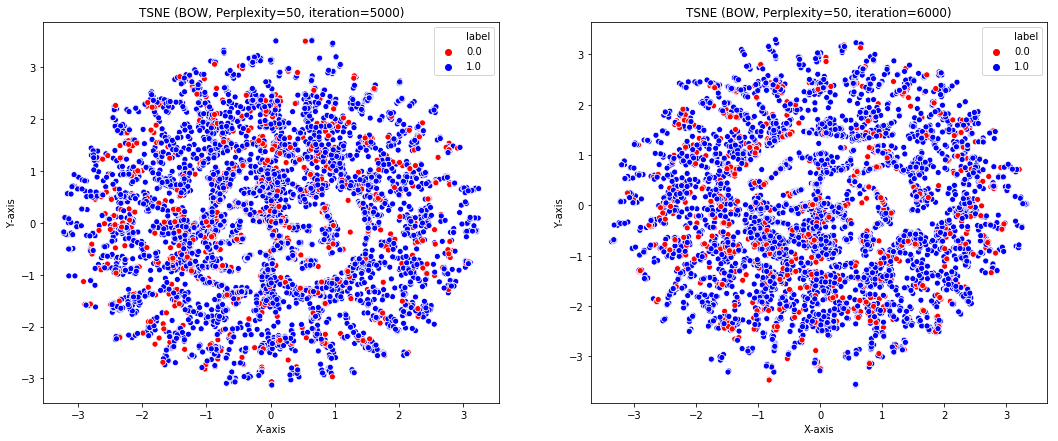

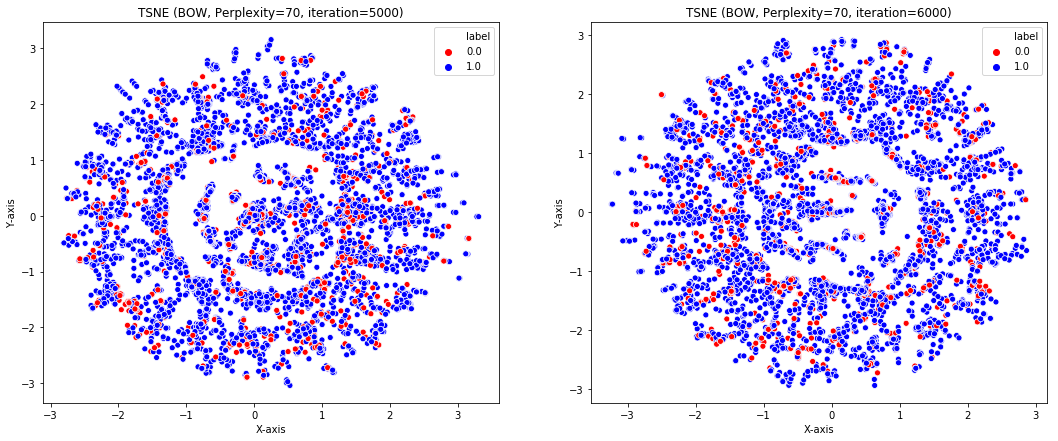

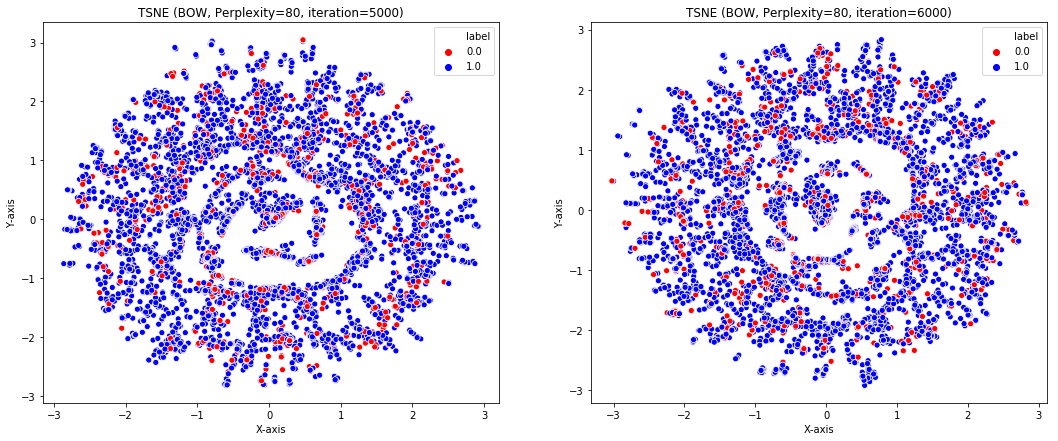

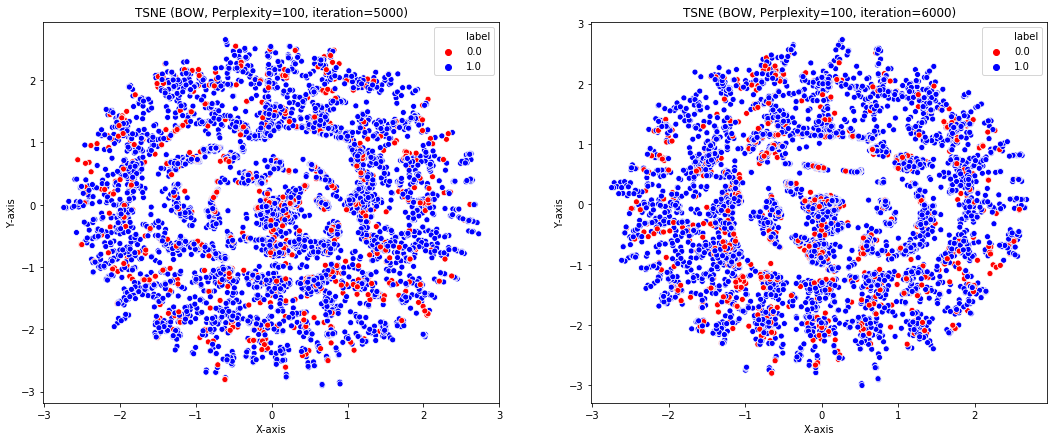

CPU times: user 5h 43min 14s, sys: 2h 53min 37s, total: 8h 36min 51s
Wall time: 33min 27s


In [8]:
print('1st run :\n')
data=std_data(X_bigram,mean=False).toarray()
%time tsne_plots(data, y, params, vect[0])

### Observation:
Note: For clear tunning of perplexity saw AVGW2V and TFIDFW2V section.
1. from the above TSNE plots we observe that for :
    
    [a.] perplexity=70, the plot almost stablized when the iterations increased from 5000 to 6000 


2. from the above TSNE plots we observe that for :
    
    [a.] perplexity=50, 80, 100, the plot is still changing its shape(not stable), when the iterations increased from 5000 to 6000 . 


3. so we choose optimal perplexity=70

### Note: 
1. To check whether our result is correct or not we re-run TSNE.

2nd run :



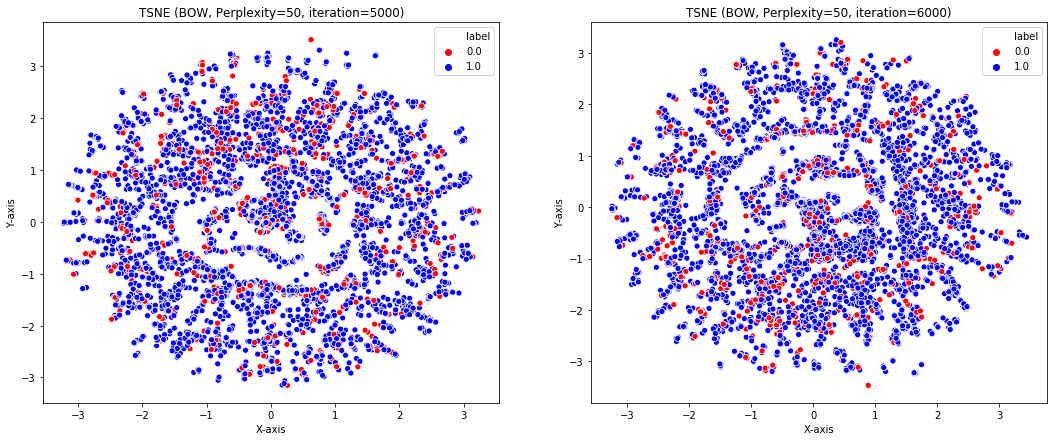

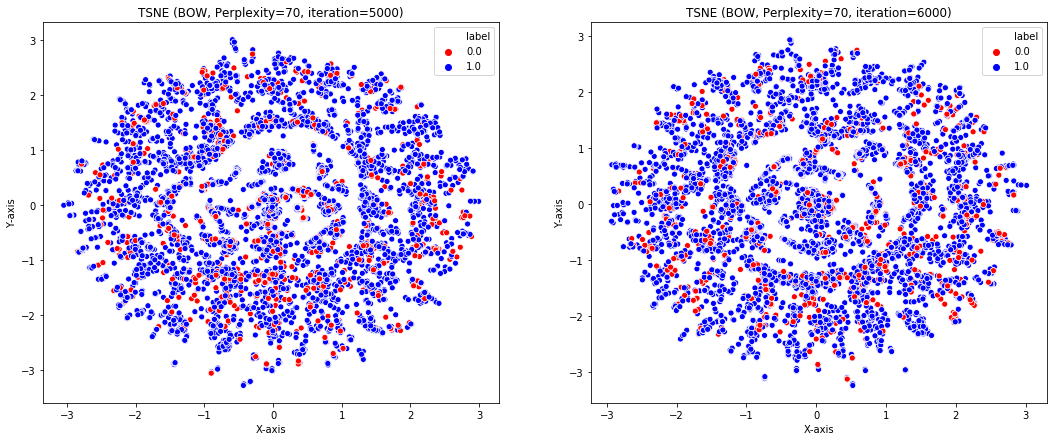

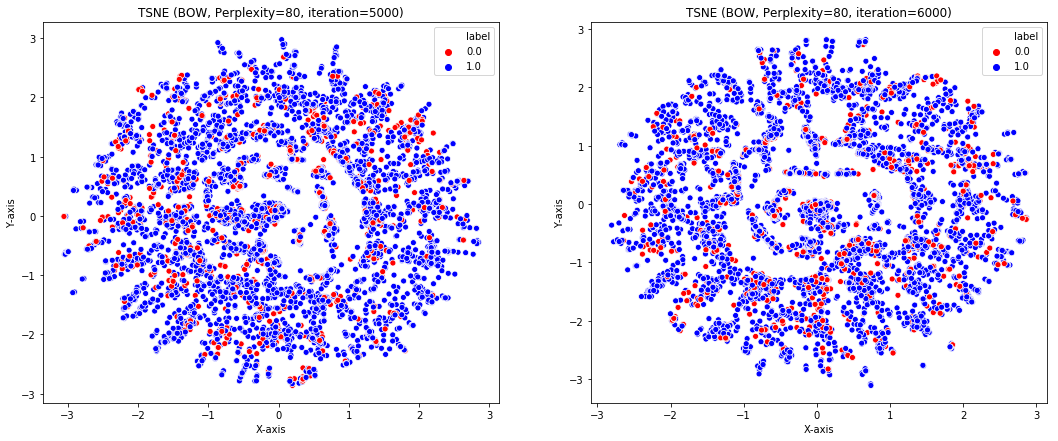

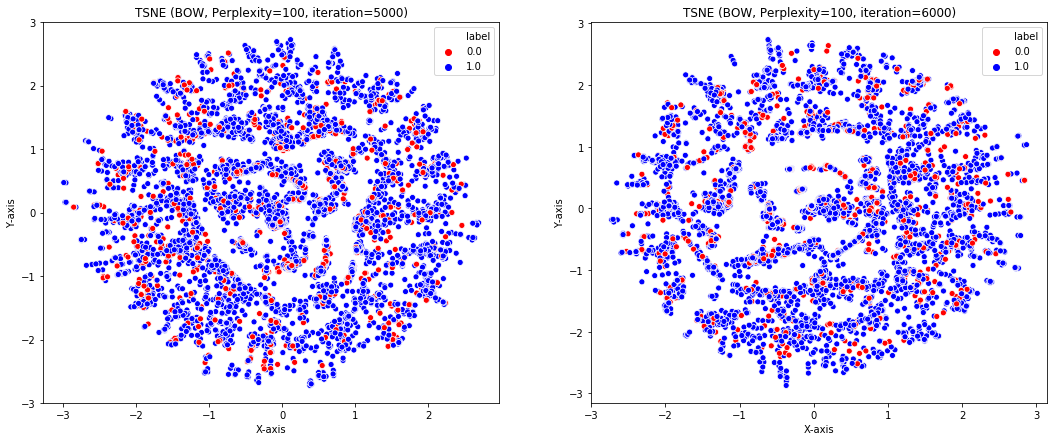

CPU times: user 5h 42min 41s, sys: 2h 48min 14s, total: 8h 30min 55s
Wall time: 33min 5s


In [9]:
print('2nd run :\n')
%time tsne_plots(data, y, params, vect[0])

### Observation:
1. from the above TSNE plots we observe that for multiple run of TSNE we get same plot so finally we choose optimal perplexity as:
    
    [a.] perplexity=70


# TFIDF

In [10]:
params['perplexity']=[70,100]

1st run :



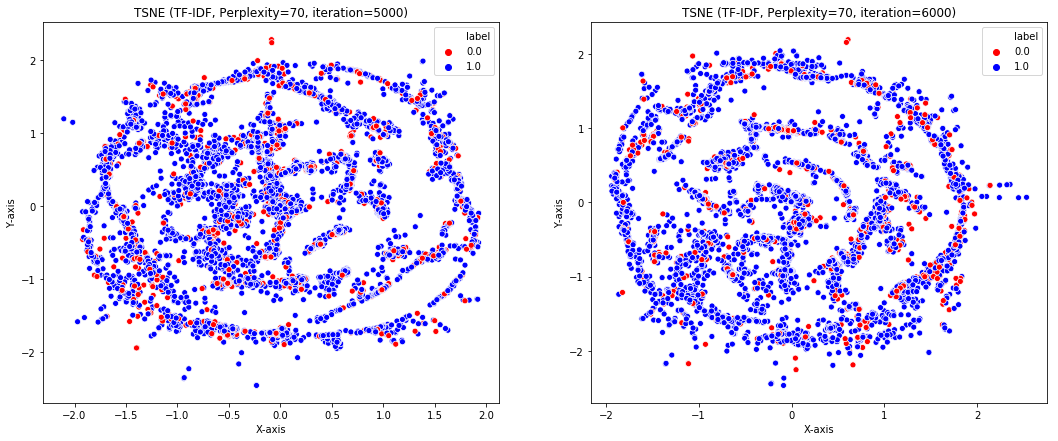

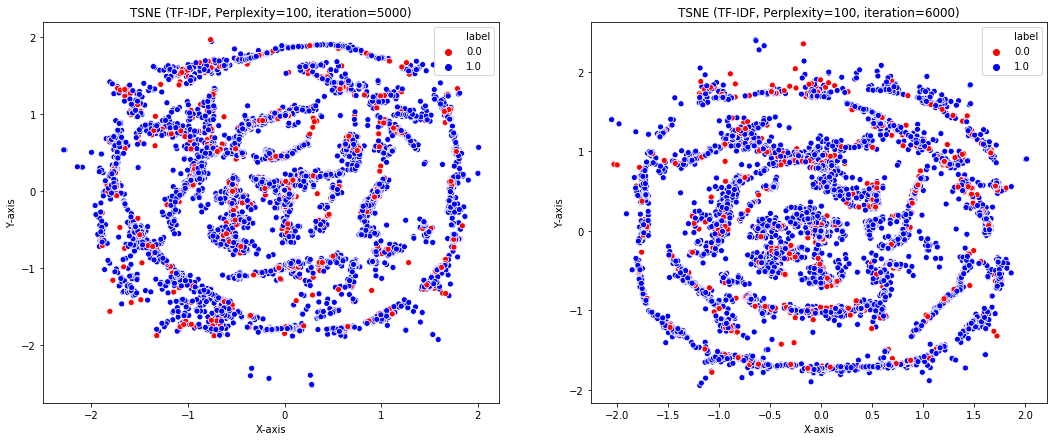

CPU times: user 3h 19min 52s, sys: 1h 32min 10s, total: 4h 52min 3s
Wall time: 18min 51s


In [11]:
print('1st run :\n')
data=std_data(X_tf_idf,mean=False).toarray()
%time tsne_plots(data, y, params, vect[1])

2nd run :



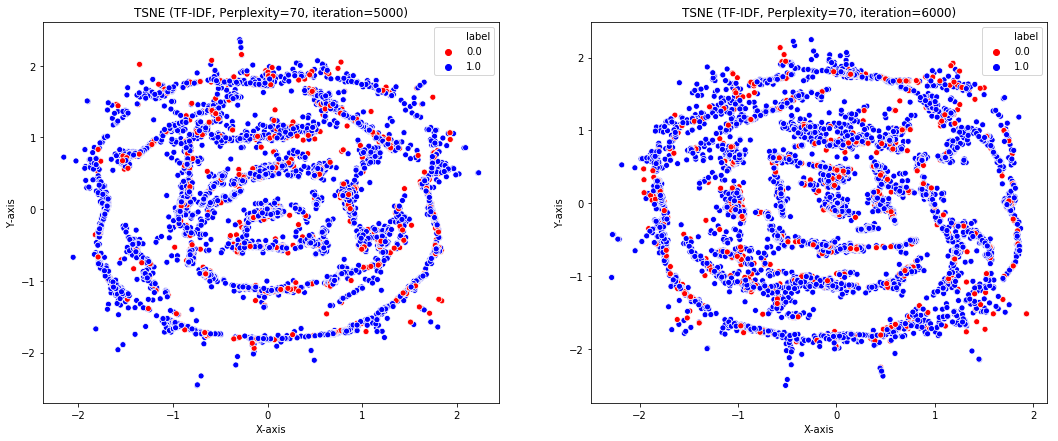

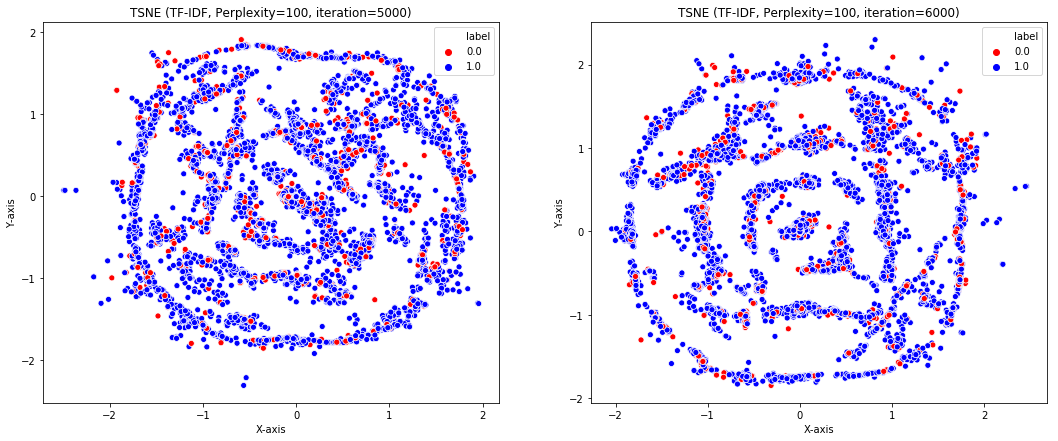

CPU times: user 3h 20min 10s, sys: 1h 32min 30s, total: 4h 52min 40s
Wall time: 18min 52s


In [12]:
print('2nd run :\n')
%time tsne_plots(data, y, params, vect[1])

# AVG-W2V

1st run :



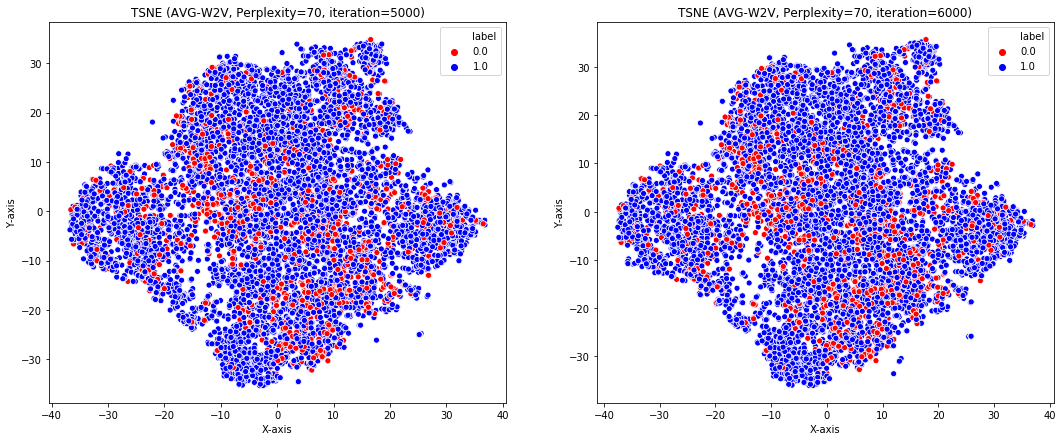

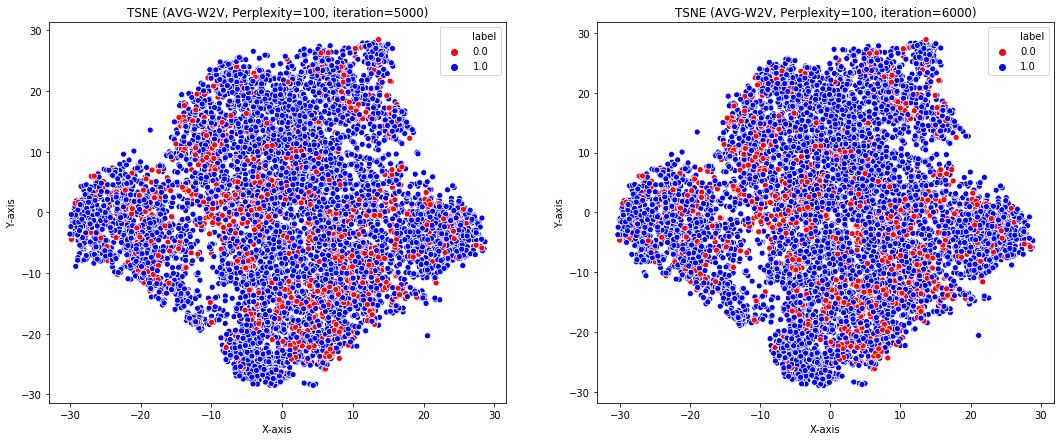

CPU times: user 1h 28min 29s, sys: 1h 16min 14s, total: 2h 44min 44s
Wall time: 10min 23s


In [13]:
print('1st run :\n')
data=std_data(avg_sent_vectors,mean=True)
%time tsne_plots(data, y, params, vect[2])

### Observation:
1. from the above TSNE plots we observe that for :
    
    [a.] perplexity=70, the plot almost stablized when the iterations increased from 5000 to 6000.


2. from the above TSNE plots we observe that for :
    
    [a.] perplexity=100, the plot is still changing its shape(not stable), when the iterations increased from 5000 to 6000. 


3. so we choose optimal perplexity=70

### Note: 
1. To check whether our result is correct or not we rerun TSNE.

2nd run :



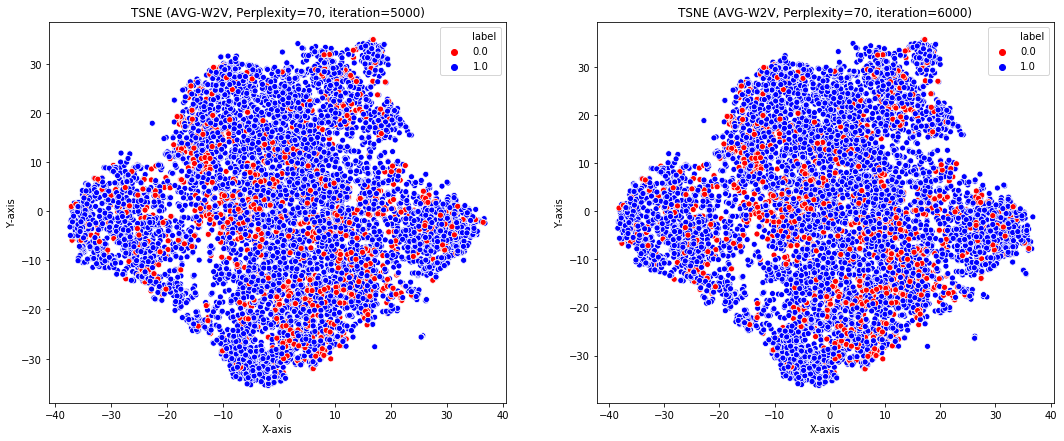

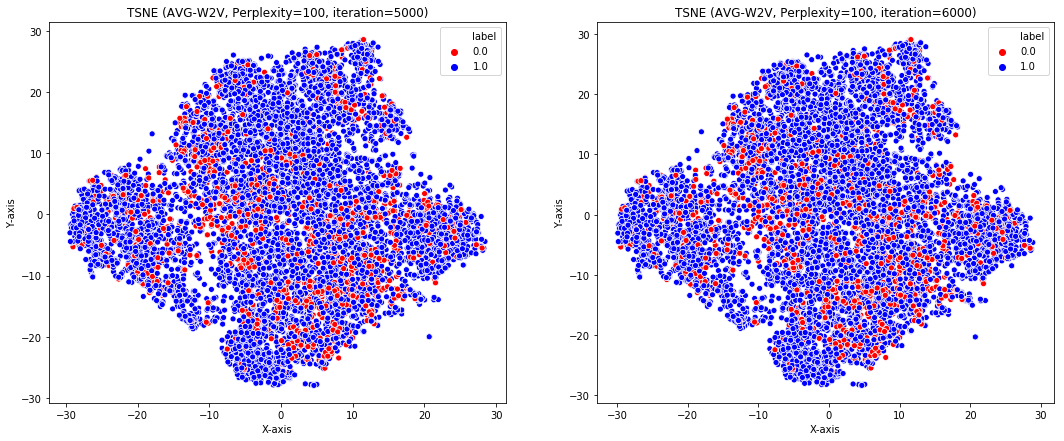

CPU times: user 1h 28min 21s, sys: 1h 16min, total: 2h 44min 22s
Wall time: 10min 22s


In [14]:
print('2nd run :\n')
%time tsne_plots(data, y, params, vect[2])

### Observation:
1. from the above TSNE plots we observe that for multiple run of TSNE we get same plot so finally we choose optimal perplexity as:
    
    [a.] perplexity=70


# TFIDF-W2V

1st run :



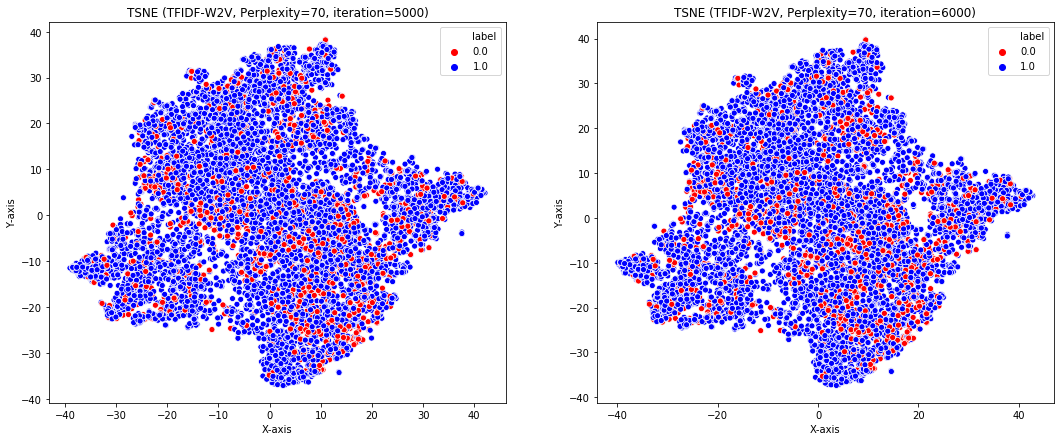

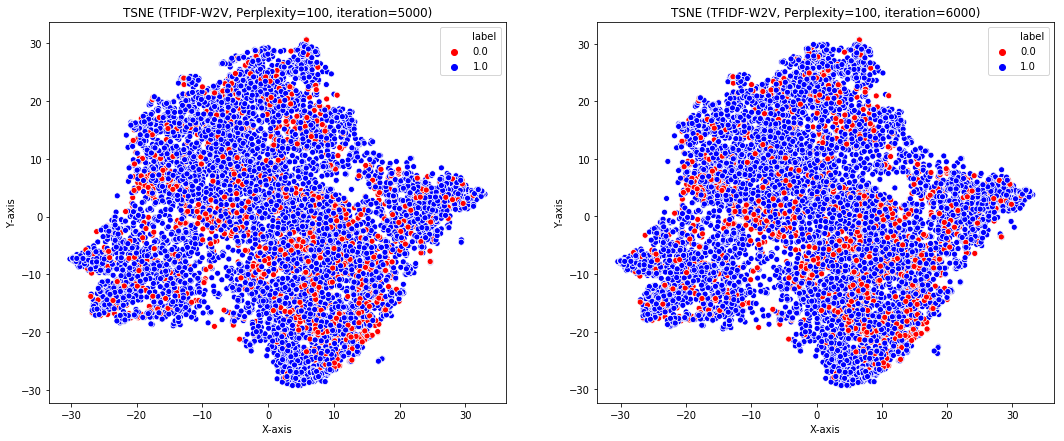

CPU times: user 1h 29min 8s, sys: 1h 16min 20s, total: 2h 45min 29s
Wall time: 10min 26s


In [15]:
print('1st run :\n')
data=std_data(tfidf_sent_vectors,mean=True)
%time tsne_plots(data, y, params, vect[3])

### Observation:
1. from the above TSNE plots we observe that for :
    
    [a.] perplexity=70, the plot almost stablized when the iterations increased from 5000 to 6000.


2. from the above TSNE plots we observe that for :
    
    [a.] perplexity=100, the plot is still changing its shape(not stable), when the iterations increased from 5000 to 6000. 


3. so we choose optimal perplexity=70

### Note: 
1. To check whether our result is correct or not we rerun TSNE.

2nd run :



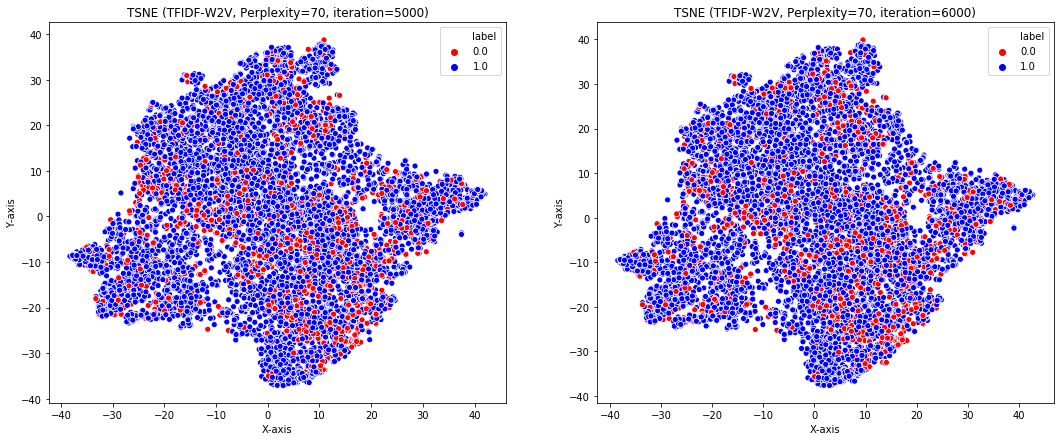

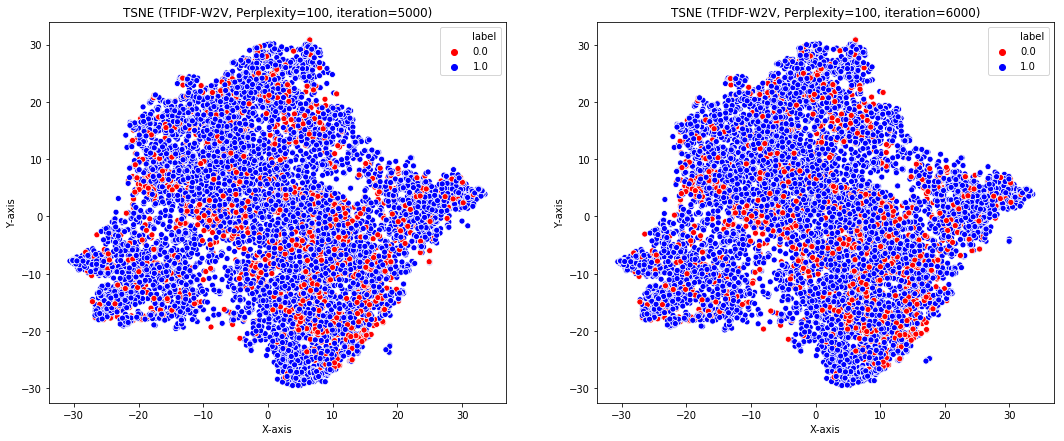

CPU times: user 1h 29min 7s, sys: 1h 16min 15s, total: 2h 45min 22s
Wall time: 10min 25s


In [16]:
print('2nd run :\n')
%time tsne_plots(data, y, params, vect[3])

### Observation:
1. from the above TSNE plots we observe that for multiple run of TSNE we get same plot so finally we choose optimal perplexity as:
    
    [a.] perplexity=70


## NOTE: 
1. For clear explanation of perplexity tunning saw AVGW2V and TFIDFW2V section where i clearly explained perplexity tunning.
2. As the TSNE is computationally expensive algorithm tunning perplexity for BOW and TFIDF is not easy, for that reason i am just showing approximate value of perplexity .

Refernce Links:
1. https://distill.pub/2016/misread-tsne/
2. http://colah.github.io/posts/2014-10-Visualizing-MNIST/
3. https://www.appliedaicourse.com/